# Data Science - Assignment 1 
Name: Rui Fang
Student number: 1000543539

## Preparing

Installing and importing packages.

In [2]:
!pip install wordcloud
!pip install unidecode


    100% |████████████████████████████████| 174kB 2.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... error
  Complete output from command /u/d/lihaoha2/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-qw6aid4m/wordcloud/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp0mwjq98opip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/wordcloud
  copying wordcloud/color_from_image.py -> build/lib.linux-x86_64-3.6/wordcloud
  copying wordcloud/wordcloud.py -> build/lib.linux-x86_64-3.6/wordcloud
  copying wordcloud/__init__.py -> build/lib.linux-x86_64-3.6/wordcloud
  copying wordcloud/tokenization.py -> build/lib.linux-x86_64-3.6/wordcloud
  copying wordcloud/wordcloud_cli.py -> build/lib.linux-x86_64-3.6/wo

In [2]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer 
import nltk
nltk.download('punkt')
#import wordcloud
import re
import unidecode
import string

/u/d/lihaoha2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[nltk_data] Downloading package punkt to /u/d/lihaoha2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Part 1 Data Cleaning - Classified Tweets

In [3]:
#using pandas to read classified tweet
classified= pd.read_csv('classified_tweets.txt', names=['class', 'id', 'date', 'query', 'user', 'text'],skiprows=[0])
#displace the first 3 rows of classified data
classified.head(3)

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [4]:
#define remove stopwords function 
with open('stop_words.txt') as stopwords_file:
     stop_words = stopwords_file.read().splitlines()

def remove_stopwords(tweet, stop_words):
    
    split_text = tweet.split(' ')
    removed_stopwords = [word for word in split_text if word not in stop_words]
    text_removed_stopwords = ' '.join(removed_stopwords)
    
    return text_removed_stopwords 

In [5]:
#define data cleanning function 
def data_cleanning(data):
    
    for i,text in enumerate(data.text):
        #remove html tags and attributes
        temp = re.sub(r'<[^>]+>|http\S+|@[a-z0-9]+|#|-','', text)
    
        #convert all non-ASCII characters to their closest ASCII equivalent 
        temp = unidecode.unidecode(temp)
    
        #remove URL
        #temp = re.sub(r'http\S+', '', temp)
        
        #convert all characters in text to lowercase
        temp = temp.lower()
        
        #remove stop words
        temp = remove_stopwords(temp, stop_words)
        
        #remove username and hashtage # for convenience part 3 model implement 
        #temp = re.sub(r'(@[a-z0-9]+)|#|-', '', temp)
        
        #update each row for the tweets
        data.text[i] = temp
    
    return data

In [6]:
def data_clean(temp):
    #remove html tags and attributes
        temp = re.sub(r'<[^>]+>|http\S+|@[a-z0-9]+|#|-','', temp)
        
        #convert all non-ASCII characters to their closest ASCII equivalent 
        temp = unidecode.unidecode(temp)
    
        #remove URL
        #temp = re.sub(r'http\S+', '', temp)
        
        #convert all characters in text to lowercase
        temp = temp.lower()
        
        #remove stop words
        temp = remove_stopwords(temp, stop_words)
        
        #remove username and hashtage # for convenience part 3 model implement 
        #temp = re.sub(r'(@[a-z0-9]+)|#|-', '', temp)
        
        #update each row for the tweets
    
        return temp

In [7]:
classified['text'] = np.vectorize(data_clean)(classified['text'])
classified_cleaned = classified

In [8]:
classified_cleaned

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"awww, that's bummer. shoulda david carr th..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting it... cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@kenichan dived times ball. managed save 50% ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,body feels itchy fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's behaving all. i'm mad. here? there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@kwesidei crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@loltrish hey long time see! yes.. rains bit ...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@tatiana_k nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,muera ?


In [ ]:
#using data cleaning function to clean the classfied tweet texts
classified_cleaned = data_cleanning(classified)
#displace the first 5 rows of cleaned classified data
classified_cleaned.head()

/u/d/lihaoha2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Part 1 Data Cleaning - Unclassified Tweets

In [9]:
#using pandas to read unclassified tweet
#converting lines in unclassified data text into string
unclassified= pd.read_csv('unclassified_tweets.txt', names=['text'])
for i in range(0,unclassified.text.size):
    unclassified.text[i] = str(unclassified.text[i])

In [13]:
#using data cleaning function to clean the unclassfied tweet texts
unclassified_cleaned = data_cleanning(unclassified)
#displace the first 5 rows of cleaned unclassified data
unclassified_cleaned

,text,Party
0,living dream. cameraman camera cameraception c...,New_Democratic
1,justin trudeau's reasons thanksgiving. today's...,Liberal
2,butt.....butt.....we're allergic latex! sne...,Other
3,2 massive explosions peace march turkey. 30 ki...,Other
4,mulcair suggests there's bad blood trudeau wor...,Liberal
5,polqc se sort de la marde avec harper pret ret...,Liberal
6,harper $8m help countries' wing govt's elected...,Conservative
7,tommy taylor,New_Democratic
8,?,Other
9,tracy retweeted tsec,Other


## Part 2 Exploratory Analysis - Unclassified Tweets

In [ ]:
#define key words identify political party procedure
#define keys words used to identify a political party of a tweet
Liberal = 'justin|trudeau|liberal|red|lpc'
Conservative = 'stephen|harper|conservative|blue'
New_Democratic = 'tom|thomas|mulcair|democratic|ndp|orange'
Green = 'elizabeth|gpc|ourrevolution|green'

#initialize number of tweets of groups
liberal_tweets = 0
conservative_tweets = 0
new_democratic_tweets = 0
green_tweets = 0
other_tweets = 0

#create a list to store each tweet's party identity
political_party = []

for row in unclassified_cleaned['text']:
        if re.search(Liberal, row):
            liberal_tweets +=1
            political_party.append('Liberal')
        elif re.search(Conservative, row):
            conservative_tweets +=1
            political_party.append('Conservative')
        elif re.search(New_Democratic, row):
            new_democratic_tweets +=1
            political_party.append('New_Democratic') 
        elif re.search(Green, row):
            green_tweets +=1
            political_party.append('Green')
        else:
            other_tweets +=1
            political_party.append('Other')
            
#add a new column assoicate with party identity to each tweet
unclassified_cleaned['Party'] = political_party

print('Number of tweets identify to Liberal_Party is:', liberal_tweets)
print('Number of tweets identify to Conservative_Party is:', conservative_tweets)
print('Number of tweets identify to New_Democratic_Party is:', new_democratic_tweets)
print('Number of tweets identify to Green_Party is:', green_tweets)
print('Number of tweets identify to none of above parties is:', other_tweets)
unclassified_cleaned

In [ ]:
#create a pie chart to visualize the distribution of the political afflilations of the tweets
labels = 'Liberal', 'Conservative', 'New_Democratic', 'Green_party', 'Other'
sizes = [liberal_tweets, conservative_tweets, new_democratic_tweets, green_tweets, other_tweets]
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%2.1f%%', startangle=90)
ax1.title.set_text('Liberal vs. Conservative vs. New Democratic vs. Green Party vs. Others')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

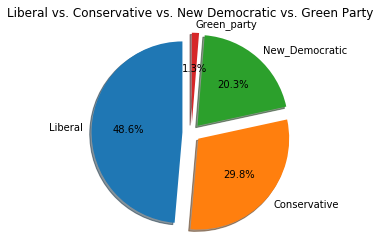

In [16]:
#create a second pie chart to visualize the distribution of the political afflilations of the tweets exclude the none political affliations tweets 
labels = 'Liberal', 'Conservative', 'New_Democratic', 'Green_party'
sizes = [liberal_tweets, conservative_tweets, new_democratic_tweets, green_tweets]
explode = (0.1, 0.1, 0.1, 0.1) 

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%2.1f%%', startangle=90)
ax2.title.set_text('Liberal vs. Conservative vs. New Democratic vs. Green Party')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Part 2: Word Cloud for classified data

In [17]:
from wordcloud.wordcloud import WordCloud
#converting tweets in classified cleaned data into a list of string
tweets_string = []

for i in range(0,classified_cleaned.text.size):
    classified_cleaned.text[i] = str(classified_cleaned.text[i])
    tweets_string.append(classified_cleaned.text[i])

classified_tweets_string = '+'.join(tweets_string)

#generate the wordcloud for classfied cleaned tweets
wordcloud = WordCloud(background_color='white', width=500, height=400,relative_scaling = 1).generate(classified_tweets_string)

plt.imshow(wordcloud)
plt.axis('on')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

# Part 2: Word Cloud for unclassified data

In [18]:
#converting tweets in unclassified cleaned data into a list of string
tweets_string = []

for i in range(0,unclassified_cleaned.text.size):
    unclassified_cleaned.text[i] = str(unclassified_cleaned.text[i])
    tweets_string.append(unclassified.text[i])

unclassified_text_string = '+'.join(tweets_string)

#generate the wordcloud for unclassfied cleaned tweets
wordcloud = WordCloud(background_color='white', width=500, height=400,relative_scaling = 1).generate(unclassified_text_string)

plt.imshow(wordcloud)
plt.axis('on')
plt.show()

NameError: name 'WordCloud' is not defined

# Part 3 Model Preparation - Logistic Regression

In [32]:
#initiate vectorizer that will be used to store the 3000 features
#using the "bag of words" idea by fitting and transforming the vectorizer 
#vectorizer = CountVectorizer(analyzer = 'word', max_features = 3000)
vectorizer = CountVectorizer()
corpus = vectorizer.fit_transform(classified_cleaned.text.tolist())
#dataset_x is the corpus_data_features
#dataset_y is the sentiment values of the classified tweets
#Split the calssified data randomly into training data 70% and test data 30%
dataset_x = corpus
dataset_y = classified_cleaned['class']
x_train, x_test, y_train, y_test  = train_test_split(dataset_x, dataset_y, train_size=0.70)

Even though the majorty of tweets are classified to "Others" but it may becuase of the limitation of my keywords that makes some of tweets unable to be correctly identified to a specific party. Moreover, a lot of those "Others" tweets may be totoally irrelevant to the elections meaning has nothing to do with any specific party. So if we ignore this category for now and only consider those tweets with parties have been explicitly identified, we can conclude that more tweets are talking about Liberal party than those about Convervative or Democratic.

# Part 4 Model implementation 

## Train logistic regression model on the trainning data with classified tweets

In [33]:
#using training data to run the logistic regression model
model = LogisticRegression()
model = model.fit(x_train, y_train)
accuracy_train = model.score(x_train, y_train)

#run the model to predict the sentiment values for the test 
y_pred = model.predict(x_test)

#comparing the predicted sentiment values with the actual sentiment values
print(classification_report(y_test, y_pred))
print('The accuracy on the train data prediction is', accuracy_train)

             precision    recall  f1-score   support

          0       0.75      0.72      0.73     29992
          4       0.73      0.77      0.75     30008

avg / total       0.74      0.74      0.74     60000

The accuracy on the train data prediction is 0.844878571429


## Evaluate Logistic Regression Model with unclassified tweets

In [34]:
#get the features of the unclassified tweets
unclassified_features = vectorizer.transform(unclassified_cleaned.text.tolist())
#get predictions using the model and unclassified tweets' features
unclassified_result = model.predict(unclassified_features)
unclassified_result = list(map(int, unclassified_result))

In [37]:
#assign predicted sentiment value to unclassified tweets 
unclassified_tested = unclassified_cleaned.assign(Sentiment = unclassified_result)
#display the first 5 rows
unclassified_tested.head()

,text,Party,Sentiment
0,living dream. cameraman camera cameraception c...,New_Democratic,0
1,justin trudeau's reasons thanksgiving. today's...,Liberal,4
2,butt.....butt.....we're allergic latex! sne...,Other,4
3,2 massive explosions peace march turkey. 30 ki...,Other,4
4,mulcair suggests there's bad blood trudeau wor...,Liberal,0


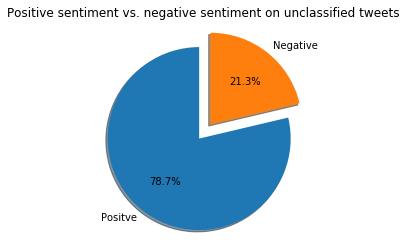

In [38]:
positive = unclassified_tested['Sentiment'].value_counts()[4]
negative = unclassified_tested['Sentiment'].value_counts()[0]

labels = 'Positve', 'Negative'
sizes = [positive, negative]
explode = (0.1, 0.1) 

fig3, ax3 = plt.subplots()
ax3.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%2.1f%%', startangle=90)
ax3.title.set_text('Positive sentiment vs. negative sentiment on unclassified tweets')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Final Discussion

The major political parties that people talke about on Twitter are Liberal, Conservative and NDP. Even though there were limitations on the key words I used to determine the possible political party that each Tweet may belong to, the results are still pretty good in terms of the rate of successfully identifying most of tweets. Moreover, a lot of those "Others" tweets may be totoally irrelevant to the elections meaning has nothing to do with any specific party. So I can safely ignore that categoty but only concentrate on the tweets that have been clearly identified to a specific political party. Among those, Liberal is the leading party that has the majoirity of people talking about followed by Conservative and then NDP.

After evaluating the sentiment of each tweets, among those tweets that have potilical party identified, Liberal still has the most of posititve as well as negative responses and then followed by Conservative and NDP. 

250 positive tweets and 386 negative tweets for Liberal.

246 positive tweets and 261 negative tweets for Conservative.

190 positive tweets and 164 negative tweets for NDP.

Both Liberal and Conservative have more negative tweets than positive tweets, while there were more positive tweets and nagative tweets. It seems people like to complain on those political parties a lot. Even thought positive tweets for NDP out numbers its negative tweets, if we only look at the number of posititve tweets for each party, Liberal still have the majority of postitive tweets so Liberal is more popular.

Now looking back at the actual election results back in 2015 which Liberal party won and comparing to this sentiment analysis results from the tweets that were twitted back then, one can clearly see the sentiment results could have given a very good predicition in which Liberal Party would win the election. Though both my regreesion model and Naive Bayes model only have a precision of 73%, they still produced very good results overall.

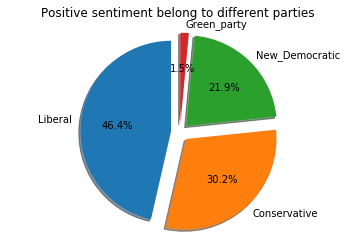

In [39]:
positive_Liberal = unclassified_tested.groupby(['Party', 'Sentiment']).size()['Liberal'][4]
positive_Conservative = unclassified_tested.groupby(['Party', 'Sentiment']).size()['Conservative'][4]
positive_New_Democratic = unclassified_tested.groupby(['Party', 'Sentiment']).size()['New_Democratic'][4]
positive_Green = unclassified_tested.groupby(['Party', 'Sentiment']).size()['Green'][4]

labels = 'Liberal', 'Conservative', 'New_Democratic', 'Green_party'
sizes = [positive_Liberal, positive_Conservative, positive_New_Democratic,positive_Green]
explode = (0.1, 0.1, 0.1, 0.1) 

fig3, ax3 = plt.subplots()
ax3.pie(sizes, explode=explode, labels=labels, shadow=True, autopct='%2.1f%%', startangle=90)
ax3.title.set_text('Positive sentiment belong to different parties')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# BONUS:
### Naive Bayes Classification
Using Naive Bayes Mutinomial classification to train and test the model.

In [43]:
#import Naive Bayes packages from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes

In [44]:
#run Naive Bayes package from sklearn
#initialize the vectorizer
vectorizer = TfidfVectorizer()
#split the classfied tweets to 70% as training sets.
#X are the features extracted from tweets, y are the targeting sentiment values
dataset_x_NB = vectorizer.fit_transform (classified_cleaned.text)
dataset_y_NB = classified_cleaned['class']
X_train, X_test, y_train, y_test  = train_test_split(dataset_x_NB, dataset_y_NB, train_size=0.70)                                                  

#split the classfied tweets to 70% as training sets.
#X are the features extracted from tweets, y are the targeting sentiment values
X_train, X_test, y_train, y_test  = train_test_split(vectorizer.fit_transform (classified_cleaned.text), 
                                                     classified_cleaned['class'], 
                                                     train_size=0.70,
                                                     random_state = 42)

In [45]:
#initialize naive bayes mutinomial classification
naive_model = naive_bayes.MultinomialNB()
#fit the model
naive_model.fit(X_train, y_train)
#predict the results using the model and test set
y_pred = naive_model.predict(X_test)
#print precision report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.75      0.74     29950
          4       0.75      0.72      0.73     30050

avg / total       0.74      0.74      0.74     60000



Comparing to logistic regression, precision for 0 is a little lower but precision for 4 is higher but the overall precision and recall rate are the same 73% for both logistic regression model and the naive bayes multinomial classification.